In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_go_fabiopc = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Local/goFolder/latency_go_hello_coldStart_50_FabioPc.csv',sep=';',index_col=0)
df_java_fabiopc = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Local/javaFolder/latency_javaQuarkus_hello_coldStart_50_FabioPc.csv',sep=';',index_col=0)
df_node_fabiopc = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Local/nodejsFolder/latency_js_hello_coldStart_50_FabioPc.csv',sep=';',index_col=0)
df_go_cluster = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Cluster/go/latency_go_hello_coldStart_50_Cluster.csv',sep=';',index_col=0)
df_node_cluster = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Cluster/node/latency_node_hello_coldStart_20_Cluster.csv',sep=';',index_col=0)
df_java_cluster = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Cluster/quarkus/latency_quarkus_hello_coldStart_20_Cluster.csv',sep=';',index_col=0)



In [2]:
df_go_cluster.drop(columns=['Unnamed: 3'], inplace=True)
df_java_cluster.drop(columns=['Unnamed: 3'], inplace=True)
df_node_cluster.drop(columns=['Unnamed: 3'], inplace=True)

df_go_fabiopc.drop(columns=['Unnamed: 3'], inplace=True)
df_java_fabiopc.drop(columns=['Unnamed: 3'], inplace=True)
df_node_fabiopc.drop(columns=['Unnamed: 3'], inplace=True)

dfs = {
    "df_go_cluster": df_go_cluster,
    "df_java_cluster": df_java_cluster,
    "df_node_cluster": df_node_cluster,
    "df_go_fabiopc": df_go_fabiopc,
    "df_java_fabiopc": df_java_fabiopc,
    "df_node_fabiopc": df_node_fabiopc
}


for name, df in dfs.items():
   print(f"{name}: shape = {df.shape}, columns = {df.columns.tolist()}")


df_go_cluster: shape = (50, 2), columns = [' latency_ns', ' latency_ms']
df_java_cluster: shape = (20, 2), columns = [' latency_ns', ' latency_ms']
df_node_cluster: shape = (20, 2), columns = [' latency_ns', ' latency_ms']
df_go_fabiopc: shape = (50, 2), columns = [' latency_ns', ' latency_ms']
df_java_fabiopc: shape = (50, 2), columns = [' latency_ns', ' latency_ms']
df_node_fabiopc: shape = (50, 2), columns = [' latency_ns', ' latency_ms']


In [3]:
# Trim last 30 rows for DataFrames with 50 rows
for name, df in dfs.items():
    if df.shape[0] == 50:
        dfs[name] = df.iloc[:-30]
        print(f"{name} trimmed to shape = {dfs[name].shape}")



df_go_cluster trimmed to shape = (20, 2)
df_go_fabiopc trimmed to shape = (20, 2)
df_java_fabiopc trimmed to shape = (20, 2)
df_node_fabiopc trimmed to shape = (20, 2)


In [4]:

for name, df in dfs.items():
   print(f"{name}: shape = {df.shape}, columns = {df.columns.tolist()}")


df_go_cluster: shape = (20, 2), columns = [' latency_ns', ' latency_ms']
df_java_cluster: shape = (20, 2), columns = [' latency_ns', ' latency_ms']
df_node_cluster: shape = (20, 2), columns = [' latency_ns', ' latency_ms']
df_go_fabiopc: shape = (20, 2), columns = [' latency_ns', ' latency_ms']
df_java_fabiopc: shape = (20, 2), columns = [' latency_ns', ' latency_ms']
df_node_fabiopc: shape = (20, 2), columns = [' latency_ns', ' latency_ms']


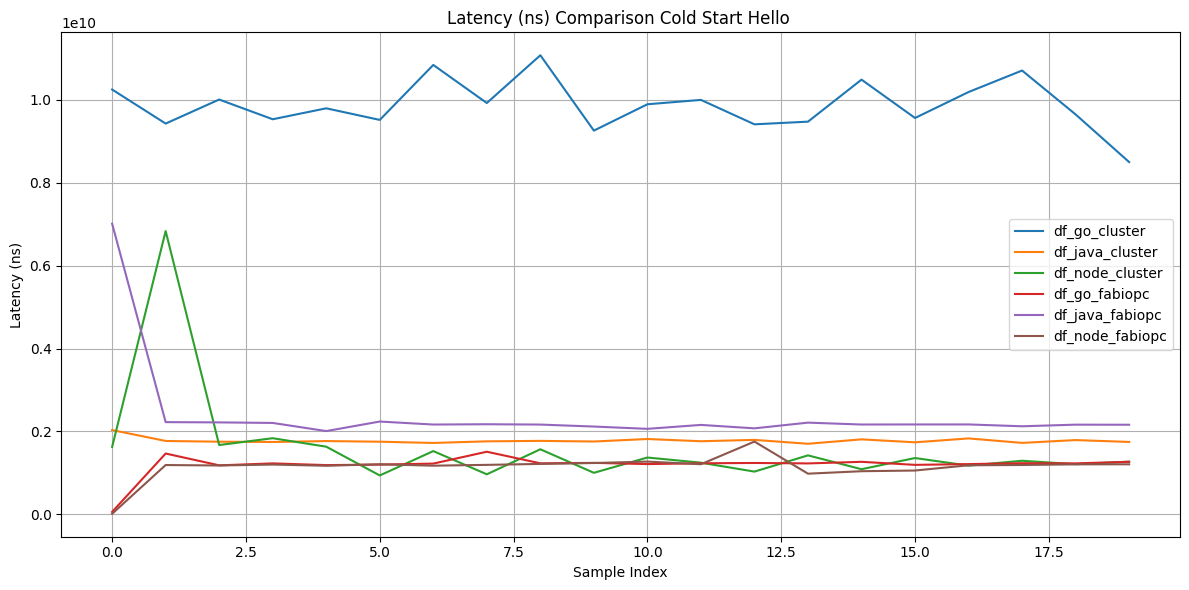

In [6]:

# Strip column names just in case (if you haven’t already)
for df in dfs.values():
    df.columns = df.columns.str.strip()

# Create the plot
plt.figure(figsize=(12, 6))

for name, df in dfs.items():
    plt.plot(df['latency_ns'].values, label=name)

plt.title('Latency (ns) Comparison Cold Start Hello ')
plt.xlabel('Sample Index')
plt.ylabel('Latency (ns)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
